In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hm/steam_reviews.csv",usecols=["app_id","app_name","review_id","language","timestamp_created","timestamp_updated","recommended","votes_helpful","votes_funny","weighted_vote_score","comment_count","steam_purchase","received_for_free","written_during_early_access","author.steamid","author.num_games_owned","author.num_reviews","author.playtime_forever","author.playtime_last_two_weeks","author.playtime_at_review","author.last_played"])
df.head()

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,292030,The Witcher 3: Wild Hunt,85184605,english,1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ADM/HM2/steam_reviews_bonus_1.csv",usecols=["app_id","app_name","review_id","language","timestamp_created","timestamp_updated","recommended","votes_helpful","votes_funny","weighted_vote_score","comment_count","steam_purchase","received_for_free","written_during_early_access","author.steamid","author.num_games_owned","author.num_reviews","author.playtime_forever","author.playtime_last_two_weeks","author.playtime_at_review","author.last_played"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/ADM/HM2/steam_reviews_bonus_2.csv",usecols=["app_id","app_name","review_id","language","timestamp_created","timestamp_updated","recommended","votes_helpful","votes_funny","weighted_vote_score","comment_count","steam_purchase","received_for_free","written_during_early_access","author.steamid","author.num_games_owned","author.num_reviews","author.playtime_forever","author.playtime_last_two_weeks","author.playtime_at_review","author.last_played"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
lista = [df,df1,df2]
df = pd.concat(lista)

In [ ]:
# we use this code to delete df1 and df2 to free out the RAM
del df1
del df2
import gc
gc.collect()

99

# Data cleaning

Here we do a first cleaning of the data to make them more readable and usefull for the analysis 

In [ ]:
# We found some empty rows with all the cells that have the value 1 so we delete them
df.drop(df[df['app_id'] == 1.0].index , inplace = True)

In [ ]:
# We found some cells that have a boolean value (True/False) instead the app_name, so we delete these rows
df.drop(df[df['app_name'].isin(["True","False"])].index , inplace = True)

In [ ]:
# as we can see in timestamp_created we have 8 empty cell
pd.isnull(df['timestamp_created']).value_counts()

In [ ]:
# we fill all the cells that have NA values in timestamp_created
df['timestamp_created'] = df['timestamp_created'].fillna(0)
df['timestamp_updated'] = df['timestamp_updated'].fillna(0)

In [ ]:
# the three dataset have different type values in timestamp_updated but we need only numeric values
df['timestamp_updated'] = pd.to_numeric(df['timestamp_updated'] , errors='coerce')

In [ ]:
# we found a cell with weighted_vote_score > 1 but this value must be in the range [0,1] 
df[df['weighted_vote_score'] > 1] = 1
# we also found some cells with NA values
df['weighted_vote_score'] = df['weighted_vote_score'].fillna(0)

In [ ]:
# we found some strings in steam_purchase so we replace these with booleans values
df["steam_purchase"] = df["steam_purchase"].replace(["True", "False"], [True, False])

In [ ]:
# We do the same thing of the previous step beacause in the column recommended we have some strings, and we would like to have booleans instead
df["recommended"] = df["recommended"].replace(["True", "False"], [True, False])

In [ ]:
# author.steamid must be an integer
df['author.steamid'] = np.floor(pd.to_numeric(df['author.steamid'], errors='coerce')).astype('Int64')

In [ ]:
# We convert each cell in 'language' in a string, because with the 2 new dataset there are also integers values
df['language'] = df['language'].astype(str)

In [ ]:
df.shape #We can clearly see that we are going to analyse a very biog dataset.

(38747379, 21)

#REQ 1

In the follwing line we can see all the columns names, before the analysis it’s important to know and understand all the column of the dataset.

In [ ]:
df.columns 

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [ ]:
df.info() # We see all the differernt type of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38747357 entries, 0 to 7000003
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          float64
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               float64
 5   timestamp_updated               object 
 6   recommended                     float64
 7   votes_helpful                   float64
 8   votes_funny                     float64
 9   weighted_vote_score             float64
 10  comment_count                   float64
 11  steam_purchase                  object 
 12  received_for_free               object 
 13  written_during_early_access     object 
 14  author.steamid                  float64
 15  author.num_games_owned          float64
 16  author.num_reviews              float64
 17  author.playtime_forever   

We want to analyse some interesting coloumns to have a better understaning of the dataset studied.

## app_name / app_id

In [ ]:
len(df.groupby('app_name')['app_name'])

315

In [ ]:
len(df.groupby('app_id')['app_id'])

315

There are 315 different apps_names and we checked that also the number of different app_id is the same.

## weighted_vote_score

In [ ]:
df['weighted_vote_score'].describe() #the median and the mean are different

count    2.174737e+07
mean     1.654424e-01
std      2.434006e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.827586e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

As we can see the mean and the median have different values; also thee median has a value equal to 0 that states that at least 50% of the reviews have a "weighted vote score" equal to zero 

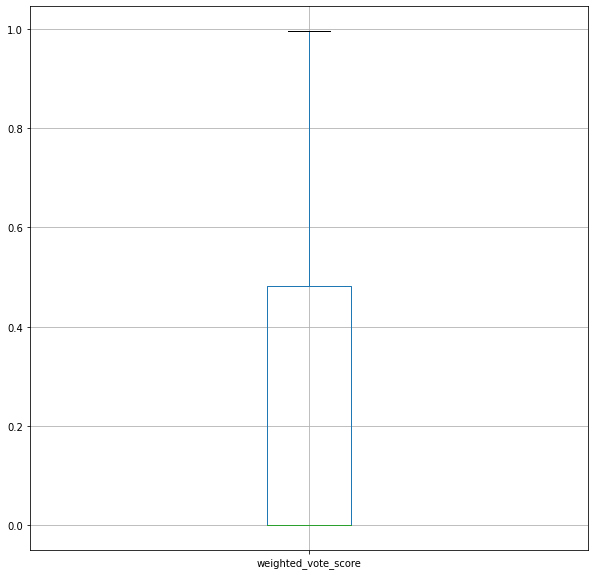

In [ ]:
df.boxplot(column='weighted_vote_score',figsize=(10,10)) 

we can see that most of the values are very close to 0 as the median and the first quartile are equal to 0

## votes_funny

In [ ]:
# Now we focus on the "votes_funny" feature
df['votes_funny'].describe()

count    2.174737e+07
mean     1.267917e+05
std      2.333553e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.294967e+09
Name: votes_funny, dtype: float64

As we can see at least 75% of the reviews have neither one "funny" vote. But there are at most 25% of reviews that have a lot of "funny" votes that brings the mean of funny votes to 12679 votes.

## language

In [ ]:
df.groupby('language')['language'].indices.keys()# we see all the different languages that are in the dataset

dict_keys(['brazilian', 'bulgarian', 'czech', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'italian', 'japanese', 'koreana', 'latam', 'norwegian', 'polish', 'portuguese', 'romanian', 'russian', 'schinese', 'spanish', 'swedish', 'tchinese', 'thai', 'turkish', 'ukrainian', 'vietnamese'])

In [ ]:
len(df.groupby('language')['language'].indices.keys()) # as we can see there are different languages

28

## author.steamid

In [ ]:
len(df.groupby('author.steamid')['author.steamid'].count()) #we can see the number of authors that have commented the apps in this dataset

16597048

## steam_purchase

In [ ]:
# We want to plot the percentage of purchased app but we consider only True and False values.
r = df[df['steam_purchase'].isin([True,False])]['steam_purchase'].value_counts().reset_index()
r['steam_purchase']= (r['steam_purchase'].divide(df.shape[0])*100).round(3)

In [ ]:
r

,index,steam_purchase
0,True,77.446
1,False,22.554


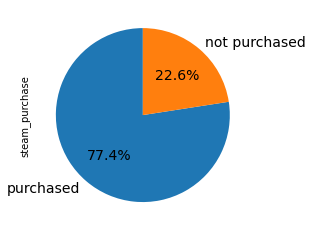

In [ ]:
r.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, labels=['purchased','not purchased'], fontsize=14, y='steam_purchase',legend=None)

## recommended

As we can see the most of the reviwed app are purchased

In [ ]:
r = df['recommended'].value_counts().reset_index()
r['recommended']= (r['recommended'].divide(df.shape[0])*100).round(3)

In [ ]:
r

,index,recommended
0,True,87.471
1,False,12.529


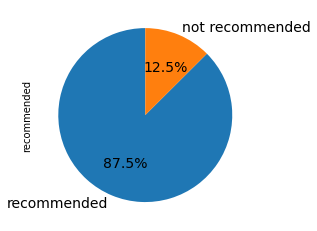

In [ ]:
# Now we want to plot the percentage of review that are recommended 
r.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, labels=['recommended','not recommended'], fontsize=14, y="recommended", legend=None)

Most of the the app that are reviewed are recommended


#REQ 2

##REQ 2.1

                            index    count
0   PLAYERUNKNOWN'S BATTLEGROUNDS  3288510
1              Grand Theft Auto V  2038232
2  Tom Clancy's Rainbow Six Siege  1683836
3                     Garry's Mod  1311048
4                            Rust  1098148
5                   Rocket League   997131
6                        Among Us   970586
7        The Witcher 3: Wild Hunt   938790
8                Dead by Daylight   837794
9           ARK: Survival Evolved   800018


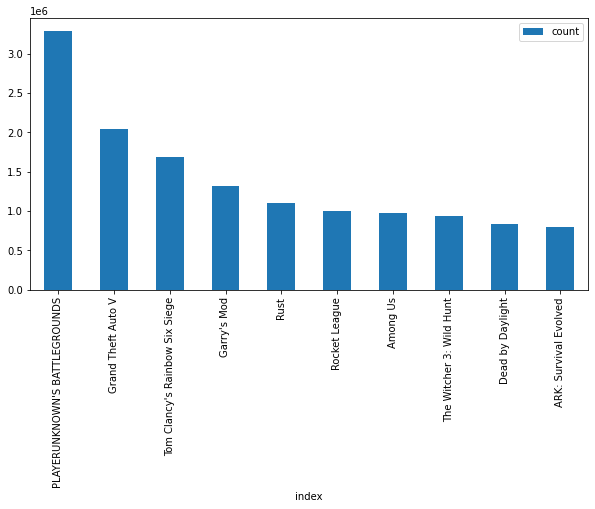

In [ ]:
# We take app_name column and we use value_counts which returns the number of times that the app appears in descending 
# order.
# Then we use reset_index beacause with the command value_count we lost the indexes, so we need to restore them beacuse we
# are going to plot the result, finally we take the first 10 values and we plot them.
d = df['app_name'].value_counts().reset_index(name='count')[:10]
print(d)
d.plot(kind="bar", figsize=(10,5),x = 'index',y='count')

From this analysis it is clear that the game most reviwed is **PUBG** and the second one is **GTA V**

## REQ 2.2

In [ ]:
# We take the weighted vote scores grouped by app_name and we compute the mean,
# then we sort them in decreasing order by printing the highest mean and their respective app.
# we use two filter to skip the booleans values and the integer values.
df[(df['app_name'].str.len() > 1) & (~df['app_name'].isin(["True","False"]))].groupby(['app_name'])["weighted_vote_score"]\
.mean().sort_values(ascending = False).head()

app_name
Hunt Down The Freeman    0.502150
Urban Empire             0.438623
METAL GEAR SURVIVE       0.421632
Identity                 0.415384
Umbrella Corps           0.414678
Name: weighted_vote_score, dtype: float64

Above we can see tha app with the major mean of `weighted_vote_score`. The first one is Hunt Down The Freeman. 

## REQ 2.3

In [ ]:
# we modified the column reccomended, we replace "True" with 1 and "False with "0" 
#in such away to sum the values and obtain the result of the numbers of reccomended
df["recommended"] = df["recommended"].replace([True, False], [1, 0])

In [ ]:
# we group by 'app_id' and we sum the values in the column reccomended to obtain the number of reccomended
count = df[['app_id','recommended']].groupby(['app_id']).sum().sort_values('recommended',ascending=False).reset_index()
# to select the max we take the first element in "count" because sort_values returns a dataframe in descending order 
max = count.iloc[0]
# to select the min we take the last element in "count"
min = count.iloc[-1]
print('the max', "app_id:",max["app_id"], "number of recommendations:", max["recommended"])
print('the min',  "app_id:",min["app_id"], "number of recommendations:",min["recommended"])

the max app_id: 578080.0 number of recommendations: 1772834.0
the min app_id: 454200.0 number of recommendations: 178.0


## REQ 2.4

In this REQ, we interpreted 'How many of these applications were purchased, and how many were given for free?' that we must consider the apps of the previous requirement (REQ 2.3) namely the apps that have the most and the least recommendations  

In [ ]:
# numbers of applications were purchased, 
# without considering that the user may have commented on the same app more than once
print('number purchased:',df[((df['app_id'] == max["app_id"]) | (df['app_id'] == min["app_id"]) ) & (df['steam_purchase'] == True)].groupby('app_name')['steam_purchase']\
.value_counts().reset_index(name='count')[['app_name','count']])

print('number got for free:',df[((df['app_id'] == max["app_id"]) | (df['app_id'] == min["app_id"]) ) & (df['steam_purchase'] == False)].groupby('app_name')['steam_purchase']\
.value_counts().reset_index(name='count')[['app_name','count']])

number purchased:                         app_name    count
0                 Neon Hardcorps      193
1  PLAYERUNKNOWN'S BATTLEGROUNDS  2627528
number got for free:                         app_name   count
0                 Neon Hardcorps     207
1  PLAYERUNKNOWN'S BATTLEGROUNDS  595448


In [ ]:
#considering that the user may have commented on the same app more than once, so let's take the precise number bought
print(df[df['app_id'] == max["app_id"]]['app_name'].values[0] ,'number purchased:',\
      len(df[(df['app_id'] == max["app_id"])  & (df['steam_purchase'] == True)].groupby('author.steamid'))\
     )
print(df[df['app_id'] == max["app_id"]]['app_name'].values[0], 'number get for free:',\
      len(df[(df['app_id'] == max["app_id"])  & (df['steam_purchase'] == False)].groupby('author.steamid'))\
     )

print(df[df['app_id'] == min["app_id"]]['app_name'].values[0],'number purchased:',\
      len(df[(df['app_id'] == min["app_id"])  & (df['steam_purchase'] == True)].groupby('author.steamid'))\
     )
print(df[df['app_id'] == min["app_id"]]['app_name'].values[0], 'number get for free:',\
      len(df[(df['app_id'] == min["app_id"])  & (df['steam_purchase'] == False)].groupby('author.steamid'))\
     )

PLAYERUNKNOWN'S BATTLEGROUNDS number purchased: 2490873
PLAYERUNKNOWN'S BATTLEGROUNDS number get for free: 586666
Neon Hardcorps number purchased: 193
Neon Hardcorps number get for free: 207


as we can see there is a noticeable difference between the 2 blocks, so a user can comment on the same app more than once(PLAYERUNKNOWN'S BATTLEGROUNDS)

# REQ 3

##REQ 3.1

In [ ]:
#we convert the timestamp to datetime
df['hour'] = pd.to_datetime(df['timestamp_created'],unit='s')

In [ ]:
# we create a new column with only the hours and the minutes
df['time'] = df['hour'].dt.time.astype(str).str[:-3]

In [ ]:
#we use value_counts which return the number of times in decreasing order that every hour appears and then we take only the first one 
df['time'].value_counts().index[0]

'14:50'

As we can see it is really common to review after lunch

##REQ 3.2

In [ ]:
# the function below returns a plot with the number of reviews for the interval of time in input
import datetime
def number_review(list_interval):
  count_review = []
  for start,end in list_interval:
    # we convert start and end to datetime
    start = datetime.datetime.strptime(start, '%H:%M:%S').time()
    end = datetime.datetime.strptime(end, '%H:%M:%S').time()
    # we select only the rows in the interval and we count them 
    temp = df.loc[(df['time'] > start) & (df['time'] < end)].count()[0]
    count_review.append(temp)
  # we transform the list of tuples in a list of strings
  time = list(map(str,list_interval))
  # we plot the result 
  plt.xticks(rotation='vertical')
  plt.bar(time, count_review, color='b', align='center')

## REQ 3.3

In [ ]:
# We create a new column which contains only the time, then we call the function(number_review) with the list_interval
df['time'] = df['hour'].dt.time
list_interval=[("06:00:00","10:59:59"),("11:00:00","13:59:59"),("14:00:00","16:59:59"),("17:00:00","19:59:59"),("20:00:00","23:59:59"),("00:00:00","02:59:59"),("03:00:00","05:59:59")]

In [ ]:
# we delete the column "hour"
del df['hour']

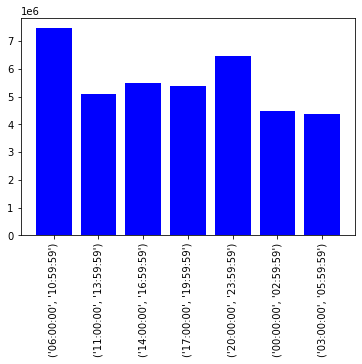

In [ ]:
# call the function number_review which return the plot 
number_review(list_interval)

#REQ 4

## REQ 4.1

In this exercise we select the 3 languages that appears the most

In [ ]:
# Finds the three most used languages for reviews, the filter is used to skip the numeric values
top = df[df['language'].str.len() > 1]['language'].value_counts()[:3]
print(top)

english     17024059
schinese     6839502
russian      4168323
Name: language, dtype: int64


As we expected, we can see that the most common language used is English followed by simplified chinese and russian. 

## REQ 4.2

This function returns a data frame which contains only the reviews written in the languges recived in input

In [ ]:
# With loc function we set a subsection of the dataset where we consider
# only rows that present the language took in input
def fun_language(df_name,languages):
  return df_name.loc[df_name['language'].isin(languages)]

##REQ 4.3

In [ ]:
# we use the fun_language and in input as parameter we pass a list which contains the results of REQ 4.1 (the language most used)
k = fun_language(df,top.index.to_list()) 
# from k we select the rows with votes_funny > 0 and then we select the top 3 results
best = k.loc[k['votes_funny'] > 0]['language'].value_counts()[:3]
# the total number of rows of each language
total = k.loc[k['language'].isin(best.index)]['language'].value_counts()[:3] 

In [ ]:
# we compute the percentage of votes_funny for the top three languages 
(round((best/total)*100)).astype(str)+ "%" 

english     11.0%
schinese    12.0%
russian     14.0%
Name: language, dtype: object

As we can see, considering the three most used languages, the reviews most voted as funny are the ones in russian language (14%).

## REQ 4.4

In [ ]:
#we replaced the strings('True', 'False') with the values (1,0) because we have found an error when we have made the istruction below
df["votes_helpful"] = df["votes_helpful"].replace(['True', 'False'], [1, 0])

In [ ]:
#we convert the data into integer
df['votes_helpful'] = pd.to_numeric(df['votes_helpful'])

In [ ]:
# total contains the numbers of rows for each language in top(top is a variable which contains the top three language)
total = df.loc[df['language'].isin(top.index)]['language'].value_counts()
#for each language in 'top' we consider only the ones that have votes_helpful > 0, we count them 
#and we dived that results for the total calculated in the previous row. Then we make the percentage of the results
((df.loc[(df['language'].isin(total.index)) & (df['votes_helpful'] > 0)]['language'].value_counts() / total) * 100)\
.round(2).astype(str) +'%'

english     28.11%
schinese     26.0%
russian     31.69%
Name: language, dtype: object

As we can see, the language in 'top' that has the major number of votes_helpful is the Russian.

# REQ 5

##REQ 5.1

In [ ]:
# Find the ten reviewers that write most reviews
d = df['author.steamid'].value_counts()[:10].reset_index(name='count')

In [ ]:
d

,index,count
0,76561198062813904,149
1,76561198315585536,132
2,76561198192166880,107
3,76561198239163744,106
4,76561198045381872,103
5,76561198064946144,100
6,76561198013146400,99
7,76561198027973296,99
8,76561197969749888,88
9,76561198032476032,86


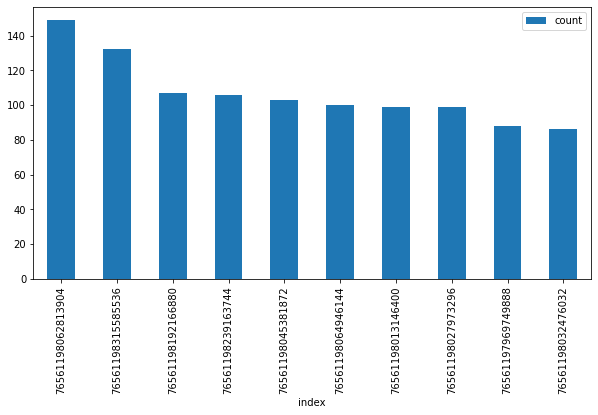

In [ ]:
d.plot(kind="bar", figsize=(10,5),x = 'index',y='count')

As we can see the reviewer that wrote more reviews has written 149 comments. The first five reviewers have written more than 100 comments. 

## REQ 5.2

We focus on the apps that the best reviewer has reviewed

In [ ]:
# We take the best reviewer and we convert in float "the author ID"
# where d['index'] means the author ID.
# Then we show all the apps that he has reviewed
most_pop = df.loc[df['author.steamid'] == d['index'][0]]

In [ ]:
# Let's show all the apps that the best reviewer has commented:
print(most_pop.groupby('app_name')['app_name'].groups.keys())

dict_keys(['A Hat in Time', 'ARK: Survival Evolved', 'Age of Empires II (2013)', 'Age of Empires: Definitive Edition', 'American Truck Simulator', 'Among Us', 'Ancestors Legacy', 'Axiom Verge', 'Banished', 'BattleBlock Theater', 'BioShock Infinite', 'Black Desert Online', 'Black Mesa', 'Blackwake', 'Bomber Crew', 'Broforce', 'Castle Crashers', 'Cave Story+', 'Celeste', 'Cities: Skylines', 'Conan Exiles', 'Counter-Strike: Source', 'Cuphead', 'DARK SOULS™ III', 'DOOM', 'DOOM Eternal', 'DUSK', 'Darksiders III', 'Day of Infamy', 'Dead Cells', 'Dead Rising 4', 'Dead by Daylight', 'Deep Rock Galactic', 'Devil May Cry HD Collection', 'Dishonored', "Don't Escape: 4 Days to Survive", "Don't Starve", 'Duck Game', 'Dying Light', 'Enter the Gungeon', 'Euro Truck Simulator 2', 'Europa Universalis IV', 'FAR: Lone Sails', 'FTL: Faster Than Light', 'Factorio', 'Fallout 4', 'Finding Paradise', 'Foundation', 'Frostpunk', 'GRIS', "Garry's Mod", 'Getting Over It with Bennett Foddy', 'Ghost of a Tale', 'Gu

## REQ 5.3

In [ ]:
# We compute the number of apps that the best reviewer has purchased (steam_purchase = True)
# and the number of apps that he got for free (steam_purchase = False)
c = most_pop['steam_purchase'].value_counts().reset_index(name='counts')
c

,index,counts
0,True,110
1,False,39


In [ ]:
# we compute the percentage of the app purchased
print('Purchased:',round((c.loc[c['index'] == True]['counts']/most_pop.shape[0])*100,2).values[0].astype(str) + "%")

Purchased: 73.83%


As we can see the best reviewer buys often his apps (73,83% of the app that has reviewed have been purchased)

In [ ]:
# we compute the percentage of the app purchased
print('downloaded for free:',round((c.loc[c['index'] == False]['counts']/most_pop.shape[0])*100,2).values[0].astype(str) + "%")

downloaded for free: 26.17%


As we can see the best reviewer has reviewed few games that he has gotten for free (only 26,17%)

## REQ 5.4

In [ ]:
# we have interpreted reviewed positively as the reviews that have reccommended = True.  We take "most_pop"(REQ 5.2) and we get
#'steam_purchase' == True and 'recommended' == True and we count the number of rows
print("Reviewed App purchased positively",\
      most_pop[(most_pop['steam_purchase'] == True) & (most_pop['recommended'] == True)]['recommended'].count())

Reviewed App purchased positively 108


In [ ]:
# we have interpreted reviewed negatively as the reviews that have reccommended = False.  We take "most_pop"(REQ 5.2) and we get
#'steam_purchase' == True and 'recommended' == False and we count the number of rows.
print("Reviewed App purchased negatively",\
most_pop[(most_pop['steam_purchase'] == True) & (most_pop['recommended'] == False)]['recommended'].count())

Reviewed App purchased negatively 2


In [ ]:
# We take "most_pop" and we get
#'steam_purchase' == False and 'recommended' == True and we count the number of rows
print("Reviewed App get free positively",\
most_pop[(most_pop['steam_purchase'] == False) & (most_pop['recommended'] == True)]['recommended'].count())

Reviewed App get free positively 38


In [ ]:
# We take "most_pop" and we get
#'steam_purchase' == False and 'recommended' == False and we count the number of rows.
print("Reviewed App get free negatively",\
most_pop[(most_pop['steam_purchase'] == False) & (most_pop['recommended'] == False)]['recommended'].count())

Reviewed App get free negatively 1


As we can deduce from the results, the author got informed about the app before downloading it.

# REQ 6

## REQ 6.1

In [ ]:
# Computes the mean of the difference between 
g = (pd.to_datetime(df['timestamp_updated'],unit='s') - pd.to_datetime(df['timestamp_created'],unit='s')).mean()

In [ ]:
print ("average days and minute:",g.days,int (g.seconds / 60))


average days and minute: 27 1106


## REQ 6.2

The average days and minutes of time that pass between a review creation and its update is equal to 27 days and 1106 minutes, considering also the reviews that are not updated. 

In [ ]:
# We create a new column, that is the difference between 
# timestamp updated and timestamp created expressed in seconds (integer)
df['totale_time'] = (pd.to_datetime(df['timestamp_updated'],unit='s') - pd.to_datetime(df['timestamp_created'],unit='s')).dt.total_seconds()

In [ ]:
# Finds the three authors that update reviews most frequently
p = df.loc[df['totale_time'] > 0].groupby('author.steamid')['author.steamid'].count().nlargest(3).reset_index(name='count')

In [ ]:
p

,author.steamid,count
0,76561198192166880,95
1,76561198206999968,63
2,76561198072450800,60


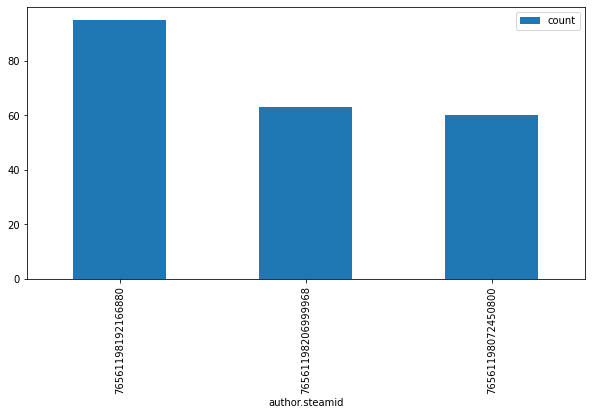

In [ ]:
p.plot(kind="bar", figsize=(10,5),x = 'author.steamid',y='count')

As we can see the author that update most frequently his reviews had updated them 95 times. The following crazy updaters have updated respectively 63 and 60 reviews. 

# REQ 7

## REQ 7.1

Check the column if there are any problems to fix

In [ ]:
df['weighted_vote_score'].describe()

count    3.874737e+07
mean     1.623657e-01
std      2.623215e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.800000e-01
max      4.230000e+02
Name: weighted_vote_score, dtype: float64

In [ ]:
k = df.loc[df['weighted_vote_score'] >= 0.5].count()[0] # Compute number of revies with a weighted vote score equal or bigger than 0,5
p = k / df.shape[0] # Divide the value computed before to the number of reviews
print(round(p,2))

0.22


As we can see the probability of reviews that have a weighted vote score equal or bigger than 0,5 compared with the entire dataset is equal to 0,22 or, in other words, 22%

## REQ 7.2

Check if the column has any problem

In [ ]:
df['votes_funny'].describe()

count    3.874737e+07
mean     1.203789e+05
std      2.273775e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.294967e+09
Name: votes_funny, dtype: float64

In [ ]:
#Compute the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5
p = 1 - ((df.loc[(df['votes_funny'] == 0.0) & (df['weighted_vote_score'] > 0.5)].count()[0])/df.loc[df['weighted_vote_score'] > 0.5].count()[0])
print(round(p,2))

0.19


As we can see the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is equal to 0,19 or, in other words to the 19% of the reviews with a weighted vote score bigger than 0,5. 

## REQ 7.3

To show if the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5” we used the following formula:

A $\perp$ B ⇔  P(A $\cap$ B) = P(A) * P(B)

In [ ]:
intersect = df.loc[(df['votes_funny'] != 0.0) & (df['weighted_vote_score'] >= 0.5)].count()[0]/df.shape[0]
A = df.loc[df['votes_funny'] != 0].count()[0]/df.shape[0]
B = df.loc[df['weighted_vote_score'] >= 0.5].count()[0]/df.shape[0]
print(round(A*B,4) , round(intersect,4))

0.0254 0.0414


As we can see the product of the probabilities is different from the probability of intersection so the "review has at least one vote as funny" variable and "probability that a review has a Weighted Vote Score equal or bigger than 0.5” variable are not indipendent. 

# REQ 8

## REQ 8.1

Test the difference for weighted score between reviews in simplified chinese and russian

In [ ]:
#Creates a new dataset with only two columns that we need
sub=df[['language','weighted_vote_score']]

In [ ]:
from scipy import stats

In [ ]:
#Creates two new variables for reviews in simplified chinese and 
#russian considering only reviews with a weighted vote score higher than zero

china = sub[(sub['language']=='schinese') & (sub['weighted_vote_score'] !=0)]['weighted_vote_score']

russia = sub[(sub['language']=='russian') & (sub['weighted_vote_score'] !=0)]['weighted_vote_score']

In [ ]:
#With module stats in scipy package we compute the p-value of stat

stats.ttest_ind(china,russia,equal_var=False).pvalue

0.0

To test if there is differences between weighted vote score for reviews made in simplified chinese and russian we use a t-test for group differences. We compute the p-value for the t-test and we obtain 0. Against a confidence level equal to alpha = 0,05 a p-value = 0 means that we reject the null hypothesis that means for both groups are equals. 

## REQ 8.2

Create a new dataset with the variables we need

Create a new variable: difference between time created review and time updated review

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.scatter(x='weighted_vote_score',y='diff',data=rq2)
ax.plot(x,y)
plt.show()

In [ ]:
#We create a linear regression model
model = LinearRegression()

In [ ]:
x = df['weighted_vote_score']

['weighted_vote_score']

In [ ]:
# We clean the weighted score values from NAN values
x.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [ ]:
# Converting weighted vote score column to an array element
x = np.array(df['weighted_vote_score']).reshape(-1,1)
# Converting total time column (difference between timestamp updated and timestamp created)
#from seconds to days
y = df['totale_time'] / (60*60*24)

In [ ]:
# We clean the total time column values from NAN values
y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)#.dropna(subset=["totale_time"], how="all")

In [ ]:
#x = np.nan_to_num(x)

In [ ]:
# We check if data are cleaned
pd.DataFrame(x).describe()

,0
count,3.874738e+07
mean,1.623330e-01
std,2.421257e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,4.800000e-01
max,1.000000e+00


In [ ]:
# Fitting the linear model for the two assigned variables
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Storing intercept and slope of the linear model in two varibles b0 b1
b0 = model.intercept_
b1 = model.coef_
print(b0,b1)

22.799468544436237 [30.60872367]


In [ ]:
# Compute the predictions of the linear model given the x values
y_pred = model.predict(x)
y_pred

array([22.79946854, 22.79946854, 22.79946854, ..., 42.12196133,
       22.79946854, 38.83261038])

In [ ]:
#Computing the Regression Deviance and its degrees of freedom
dreg = sum((y_pred - y.mean())**2)
greg = 1

In [ ]:
#Computing the Residual Deviance and its degrees of freedom
dres = sum((y - y_pred)**2)
gres = len(y)-2

In [ ]:
#Computing the Fisher statistic
Foss = (dreg*gres)/(dres*greg)

True

In [ ]:
# Computing the t test for the b1 value
s = b1/np.sqrt(Foss)
s

array([0.09091731])

We are testing with the computed slope of the linear model in this test the null hypothesis that b1 is equal to 0 (that means that the two variables are not related) and the alternative hypothesis that b1 is not 0 (two tails test).
To accept the null hypothesis the t-test we have computed must be lower than the thresholds that we set for a confidence level of alpha = 0,05.
We have found out that the t-test is equal to 0,091. Looking at the t-distribution table we find out that the confidence level at 1-alpha/2 level is equal to 1,96.
We see that 0,091 is lower than 1,96 so we accept the null hypothesis so the two variables are not linear related. 

To confirm our results we can compute linear correlation coefficient:

In [ ]:
x = np.array(df['weighted_vote_score'])
y = np.array(df['totale_time'])
n = len(x)
r = np.corrcoef(x, y)
r[0][1]

0.054006150742646294

As we can see from the correlation computed the correlation between wieghted vote score and the time that passed between review creation and update is near to 0, that means there is no correlation between two variables

## REQ 8.3

In [ ]:
# Creating two subsets in order to split reviews with recommendations and revies without recommendation
recom = df[['weighted_vote_score','totale_time','recommended']].loc[df['recommended'] == True]
norec = df[['weighted_vote_score','totale_time','recommended']].loc[df['recommended'] == False]

In [ ]:
# Create two models to store our results
model1 = LinearRegression()
model2 = LinearRegression()

In [ ]:
# Assign the columns we need to some values
xr = np.array(recom['weighted_vote_score']).reshape(-1,1)
yr = recom['totale_time']/(60*60*24)
xn = np.array(norec['weighted_vote_score']).reshape(-1,1)
yn = norec['totale_time']/(60*60*24)

In [ ]:
# Fitting the linear regression model for both of the datasets
model1.fit(xr,yr)

model2.fit(xn,yn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Assign intercept and slope for the regression model of each dataset
b0r = model1.intercept_
b1r = model1.coef_

b0n = model2.intercept_
b1n = model2.coef_

print(b0r, b1r)
print(b0n, b1n)

21.73751545250441 [33.85324672]
34.817377214984845 [1.69085199]


In [ ]:
# Compute the extimated values of the linear regression model for both of the datasets
yr_pred = model1.predict(xr)

yn_pred = model2.predict(xn)

In [ ]:
# Compute the t-test for the recommended apps only
dregr = sum((yr_pred - yr.mean())**2)
gregr = 1

dresr = sum((yr - yr_pred)**2)
gresr = len(yr)-2

fossr = (dregr*gresr)/(dresr*gregr)

tr = b1r/np.sqrt(fossr)

In [ ]:
tr

array([0.09804194])

In [ ]:
# Compute the t-test for the not-recommended apps only
dregn = sum((yn_pred - yn.mean())**2)
gregn = 1

dresn = sum((yn - yn_pred)**2)
gresn = len(yn)-2

fossn = (dregn*gresn)/(dresn*gregn)

tn = b1n/np.sqrt(fossn)

In [ ]:
tn

array([0.27181557])

We use the same test in RQ8.2 to test if there is a significant relantionship between weighted vote score and "totale time" (difference between timestamp_update and timestamp created expressed into days). We set a confidence level of alpha = 0,05 and we obtain a threshold equal to 1,96 for the t-quantile. As we can see both of the t-test are lower than the threshold: <br/>
tr = 0,098 < 1,96 <br/>
tn = 0,272 < 1,96 <br/>
so we can accept the null hypothesis for both of the subsets that the coefficient value is significantly equal to 0. So there is no significative linear relation between the two variables considering also only recommended app or not-recommended. 

## REQ 8.4

What are histograms, bar plots, scatterplots and pie charts used for? <br/>

Histograms are used to represent discrete or continous quantitative variables; the data are represented in intervals that they don't necessarily have to be of the same width. They're often useful when dealing with large datasets. The bar height represent the density (or frequency) of the classes represented. <br/>

Bar Plot are used to represent discrete quantitative variables or qualitative variables. Each bar corresponds to a categorical value of the variable that we are representing. The height of the bar represents the absolute or relative frequency of the categorical value in the dataset. <br/>

Scatterplots are used to represent quantitative variables in order to show a significative relation between two variable. The variables are represented in a two dimensional space (cartesian space) where each axis is assigned to one of the two variables. Each unit is represented by a point in the space. This plot is useful to see a correlation between the two variables. <br/>

Pie charts are used to represent quantitative discrete variables or qualitative variables and are useful to show the composition of the categorical values for a variable. 

## REQ 8.5

What insights can you extract from a Box Plot? <br/>

Boxplots are useful to represent a single quantitative variable and describes its distribution with statistical summaries. <br/>
Boxplots can show median (or mean, depends on the boxplot type we are creating), quartiles (1° and 3°), interquartile range, minimum and maximum of distribution and also outliers. 

# Theoretical Questions

## REQ 1

```
Input
    A: array of length n
    k: integers between 1 and n
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
```

**1. What does the algorithm compute?**

This algorithm returns the k-th largest element of A

**2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n**

The worst case is when I have an ordered list, there are no repeated elements, s is the second largest element in the list and k = 1.
Analyzing the complexity of each row:
- The assigment of s is O(1)
- The assigment of L has cost O(n) because it iterates each element of A  
- The assigment of R has cost O(n) for the same reason
- The remaining instructions have constant complexity (apart from the recursive calls)

Since each time s is the second largest number of the list, we are going to call the recursion with a list with size (n-1), so the cost is $4 * (n + (n-1) + (n-2) + ... + 2 + 1) \rightarrow n^2$.

However, in some cases the algorithm could not ends: for example, if we have an ordered list, k = 1 and we always draw the same s, the algorithm goes into a loop because the list stays always the same.

**3. What is asymptotically the running time of the algorithm in the best case?**

One of the best cases is when we have an ordered list, s is going to be the maximum number and we have k which is the index of the last element of the list.
In this case, the complexity is $O(n) + O(n) + 4 \rightarrow O(n)$.

## REQ 2


```
function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
```

```
function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
```



1. How much running time does it take to execute splitSwap(a, 0, n)? 

\begin{align}
        \text{T}(n) = \left\{
        \begin{array}{cl}
        2& n \le 1 \\
        T(\frac{n}{2}) + T(\frac{n}{2}) + 4\frac{n}{2} + 1 & otherwise
        \end{array}
        \right.
    \end{align} 
    
The first term, T($\frac{n}{2}$), represents the first recursive call (i.e. `splitSwap(a, l, n/2)`), its cost is $\frac{n}{2}$ since it is called only on half array.

Instead, the second term, T($\frac{n}{2}$), represents the second recursive call (i.e. `splitSwap(a, l+ n /2, n/2)`), its cost is again $\frac{n}{2}$ since it is called on the second half of the array.

While, the last term, $\frac{n}{2}$, is the cost for the call to the `swapList` function due to the `for i = 1 to n/2`. <br/>
Now we solve $T(n)$:<br/>
$\begin{align}
T(n) &= T(\frac{n}{2}) + T(\frac{n}{2}) + (\frac{4n}{2}) + 1 \\ 
& = 2T(\frac{n}{2}) + (\frac{4n}{2}) \\
&\leq 4T(\frac{n}{4}) + 8(\frac{n}{4})  + (\frac{4n}{2}) \\
&\leq 8T(\frac{n}{8}) + (\frac{16n}{8}) + 8(\frac{n}{4})  + (\frac{4n}{2}) \\
&\leq 8T(\frac{n}{8}) + 2n +2n +2n \\
&\leq 2^kT(\frac{n}{2^k}) + 6n \\
&2^{log(n)} + nlog(n)
\end{align}$

$2^{log(n)}$ is equal to 2 to the power of the number of times that we call the recursion , while $nlog(n)$ is equal to 2 times the number of times that we call the recursion.
Comparing the two terms we can deduce that $nlog(n)$ grows faster than $2^{log(n)}$, so the final complexity is $O(nlog(n))$.

2. What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

  *   What does this algorithm do?<br/>
  It skips the first $l$ elements and inverts the next $n$ elements of the list

  * Is it optimal?<br/>
  No, it is not optimal, because it can be done in $O(n)$. In the following list are reported the details of the algorithm: 

    - create a new list which contains the elements which are to be skipped 
    - starting from the $(l+n)$-th element, iterate backwards till $l$ (for i=l+n to l) and add the element a[i] to the new list
    - add the remaining elements

  * **Describe the mechanism of the algorithm in details**<br/>
    We describe the algorithm using the example of an execution.<br/>
    If we have:<br/>
    $a=[1,2,3,4]$,<br/>
    $l= 0$,<br/>
    $n=4$.<br/>
So we call the function with $(a,0,4)$.<br/>
    At the beginning $n$ is greater than 1 so the algorithm does not exit, so the recursion will be called with $(a,0,2)$ until $n = 1$ (see the tree for all the details of the recursive calls), then when it returns to the parent function it will have $n=2$ and the function swaplist will be called.<br/>
  SwapList receives three parameters as input: <br/>
  • $a$ is list <br/>
  • $l$ an index <br/>
  • $n$ number between 1 and length of $a$ <br/>
  Below are all the steps that the algorithm performs.
  Looking at the tree (first drawing above), we have that the red arrows indicate the recursive calls that call the swaplist function.
  Recursion works from bottom to top, so the first call to execute the swaplist function wil be the case with $(a, 0, 2)$ where the algorithm will do a single iteration and swap the first element with the second so $a$ will change like this:<br/>
  $a = [2,1,3,4]$<br/>
  Then the second call will also do a single iteration with $(a, 2,2)$ it will swap the third and fourth elements, so "a" becomes<br/>
  $a = [2,1,4,3]$<br/>
  Then the last call instead will do 2 iterations, where in the first it swap the first with the third and in the second iteration it swap the second with the fourth so $a$ becomes<br/>
  $a = [4,3,2,1]$<br/>
The last drawing (below) shows how the list is modified, the drawing must be read from bottom to top, so first the circle is number 1 then 2, and then 3.<br/>
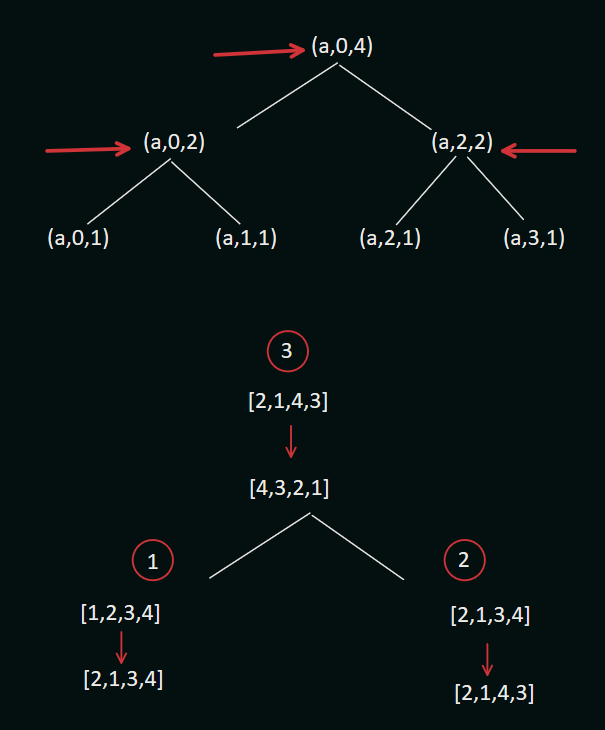

## REQ 3

This is the list that we will use for all 3 counterexamples:

$V = [ (1,1) , (6,4) , (18,5) , (22,5), (28,7) ]$

where each element in the list is a tuple where the first element is the value and the second one is the weight.

  * **Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded**
    * $V = [ (1,1) , (6,4) , (18,5) , (22,5), (28,7) ]$<br/>
    If we have $W = 11$, we can only take the first 3 elements in the list and we obtain 25 as final value, but the optimal value is 40 if we take $(18,5)$ and $(22,5)$.
  * **Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded**
    * $V = [(28, 7), (22, 5), (18, 5), (6, 4), (1, 1)]$<br/>
    If we have $W = 11$, we can only take the first element in the list and we obtain 28 as final value, but the optimal value, as said before, is 40 if we take $(18,5)$ and $(22,5)$
  * **Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded**
    * $V = [(28, 7), (22, 5), (18, 5), (6, 4), (1, 1)]$<br/>
    If we have $W = 11$, we can only take the first element in the list and we obtain 28 as final value, but the optimal value, once again, is 40 if we take $(18,5)$ and $(22,5)$

